In [14]:
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [6]:
# constants 
OPEN = 'Open'
HIGH = 'High'
LOW = 'Low'
VOLUME = 'Volume'
CLOSE = 'Close'
SP_SYMBOL = '^GSPC'
PRICE_LABLE = 'S&P Price'
PREDICTED_LABLE = 'S&P Predictd Price'
X_LABLE = 'Date'
Y_LABLE = 'Price'
HIGH_OPEN_DISTANCE = 'high_open_distance'
LOW_OPEN_DISTANCE = 'low_open_distance'
GAIN = 'gain'

In [7]:
def graph(x, y, y_pred = None):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color = 'blue', label = PRICE_LABLE)
    if y_pred is not None:
      plt.plot(x, y_pred, color = 'green', label = PREDICTED_LABLE)
    plt.xlabel(X_LABLE)
    plt.ylabel(Y_LABLE)
    plt.legend(fontsize=18)
    plt.show()

**Data collecting from yfinance**

In [8]:
end_date = datetime.strftime(datetime.today(), "%Y-%m-%d")
start_date = datetime.strftime(datetime.now() - timedelta(days = (365 * 30)), "%Y-%m-%d")
# get S&P 500 history open, high, low, volume, close, adj close over 30 years
data = yf.download(SP_SYMBOL, start = start_date, end = end_date)
dates = data.index
print(data)

[*********************100%***********************]  1 of 1 completed
                   Open         High  ...    Adj Close      Volume
Date                                  ...                         
1991-07-05   373.339996   375.510010  ...   374.079987    69910000
1991-07-08   374.089996   377.940002  ...   377.940002   138330000
1991-07-09   377.940002   378.579987  ...   376.109985   151820000
1991-07-10   376.109985   380.350006  ...   375.739990   178290000
1991-07-11   375.730011   377.679993  ...   376.970001   157930000
...                 ...          ...  ...          ...         ...
2021-06-21  4173.399902  4226.240234  ...  4224.790039  3391740000
2021-06-22  4224.609863  4255.839844  ...  4246.439941  3208760000
2021-06-23  4249.270020  4256.600098  ...  4241.839844  3172440000
2021-06-24  4256.970215  4271.279785  ...  4266.490234  3141680000
2021-06-25  4274.450195  4286.120117  ...  4280.700195  6248390000

[7552 rows x 6 columns]


**S&P Index Price Over 30 Years**

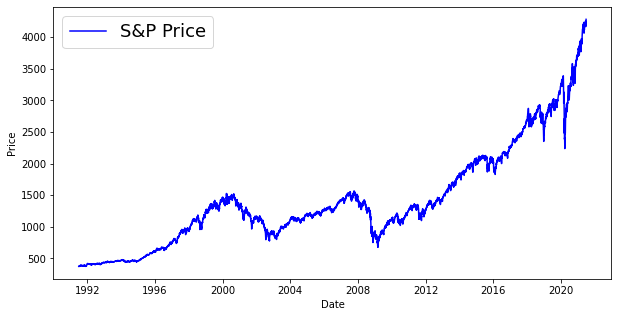

In [38]:
graph(data.index, data[CLOSE])

**Adding Outcome**

In [9]:
attributes = [HIGH_OPEN_DISTANCE, LOW_OPEN_DISTANCE, GAIN]
X = {attr: [] for attr in attributes}
y = []
prev_closing_price = data.head(1)[CLOSE].values[0]
next_days_data = data.iloc[1:]
prev_days_data = data.iloc[:-1]
# y: 1 if the bar was positive (close > previous closing price), 0 otherwise
for date, price in next_days_data.iterrows():
    if price[CLOSE] > prev_closing_price:
        y.append(1)
    else:
        y.append(0)
    prev_closing_price = price[CLOSE]
# distance between Highest and Opening price
X[HIGH_OPEN_DISTANCE] = prev_days_data[HIGH].array - prev_days_data[OPEN].array
# distance between Lowest and Opening price
X[LOW_OPEN_DISTANCE] = prev_days_data[LOW].array - prev_days_data[OPEN].array
# distance between Closing and Opening price
X[GAIN] = prev_days_data[CLOSE].array - prev_days_data[OPEN].array
X = pd.DataFrame(X)
print(X)

      high_open_distance  low_open_distance       gain
0               2.170013          -1.169983   0.739990
1               3.850006          -3.169983   3.850006
2               0.639984          -2.570007  -1.830017
3               4.240021          -0.909973  -0.369995
4               1.949982          -0.220001   1.239990
...                  ...                ...        ...
7546            0.000000         -40.379883 -38.329590
7547           52.840332           0.000000  51.390137
7548           31.229980          -7.339844  21.830078
7549            7.330078          -7.839844  -7.430176
7550           14.309570           0.000000   9.520020

[7551 rows x 3 columns]


**Split Data To Train And Test**


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 / 3, random_state = 0, shuffle = False)

**Training a Decision Tree Model**

In [41]:
# predict
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

**Table Of S&P Actual Outcome vs Predicted**

In [42]:
dfr=pd.DataFrame({'Actual_Outcome':y_test, 'Predicted_Outcome':y_pred})
print(dfr.head(10))

   Actual_Outcome  Predicted_Outcome
0               1                  0
1               1                  1
2               1                  1
3               1                  0
4               1                  0
5               0                  1
6               1                  0
7               1                  1
8               0                  0
9               0                  0


**Prediction accuracy**

In [43]:
print('Accuracy of decision tree model is ' + str(accuracy_score(y_test, y_pred) * 100) + '%')

Accuracy of decision tree model is 50.933651172030196%


**Training a Logistic Regression Model**

In [44]:
logistic_regression_classifier = LogisticRegression(random_state = 0)
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_test)

**Prediction accuracy**

In [45]:
print('Accuracy of logistic regression model is ' + str(accuracy_score(y_test, y_pred) * 100) + '%')

Accuracy of logistic regression model is 53.118792212951924%


**Training a SVM Model**

In [11]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [15]:
print('Accuracy of SVM model is ' + str(accuracy_score(y_test, y_pred) * 100) + '%')

Accuracy of SVM model is 54.66825586015097%


**Training a Naive Bayes Model**

In [16]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [17]:
print('Accuracy of Naive Bayes model is ' + str(accuracy_score(y_test, y_pred) * 100) + '%')

Accuracy of Naive Bayes model is 53.039332538736595%


**Trying to predict closing price value with Linear Regression**

In [21]:
# split to X and y
X = data[[OPEN, HIGH, LOW, VOLUME]]
X = X.iloc[:-1]
print(X)

                   Open         High          Low      Volume
Date                                                         
1991-07-05   373.339996   375.510010   372.170013    69910000
1991-07-08   374.089996   377.940002   370.920013   138330000
1991-07-09   377.940002   378.579987   375.369995   151820000
1991-07-10   376.109985   380.350006   375.200012   178290000
1991-07-11   375.730011   377.679993   375.510010   157930000
...                 ...          ...          ...         ...
2021-06-18  4204.779785  4204.779785  4164.399902  6084980000
2021-06-21  4173.399902  4226.240234  4173.399902  3391740000
2021-06-22  4224.609863  4255.839844  4217.270020  3208760000
2021-06-23  4249.270020  4256.600098  4241.430176  3172440000
2021-06-24  4256.970215  4271.279785  4256.970215  3141680000

[7551 rows x 4 columns]


In [22]:
y = data[CLOSE]
y = y[1:]
print(y)

Date
1991-07-08     377.940002
1991-07-09     376.109985
1991-07-10     375.739990
1991-07-11     376.970001
1991-07-12     380.250000
                 ...     
2021-06-21    4224.790039
2021-06-22    4246.439941
2021-06-23    4241.839844
2021-06-24    4266.490234
2021-06-25    4280.700195
Name: Close, Length: 7551, dtype: float64


**Predict closing price of next day value with Linear Regression model**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 3, random_state=0, shuffle = False)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)

**Table Of S&P Actual Index Prices vs Predicted Values**

In [24]:
dfr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':y_pred})
print(dfr.head(10))

            Actual_Price  Predicted_Price
Date                                     
2011-06-27   1280.099976      1271.211021
2011-06-28   1296.670044      1281.318991
2011-06-29   1307.410034      1293.767032
2011-06-30   1320.640015      1306.341241
2011-07-01   1339.670044      1318.961426
2011-07-05   1337.880005      1335.934715
2011-07-06   1339.219971      1335.170724
2011-07-07   1353.219971      1334.183270
2011-07-08   1343.800049      1353.243815
2011-07-11   1319.489990      1337.626094


**S&P Actual Index Prices vs Predicted Values**

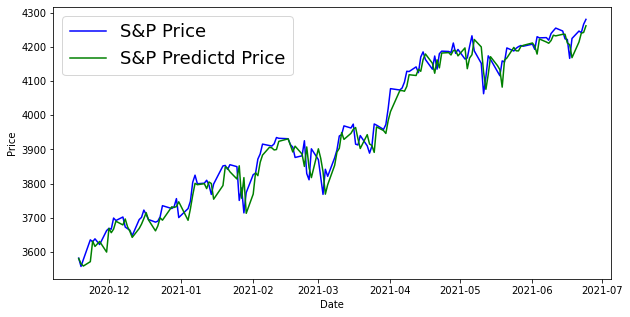

In [25]:
graph(X_test.tail(150).index, y_test[-150:], y_pred=y_pred[-150:])